In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings("ignore")

dataset_2018 = "dataset/2018.csv"
dataset_2018_df = pd.read_csv(dataset_2018)

countries_list = list(dataset_2018_df["Country"])
dataset_2018_df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom
0,Finland,1,7.632,1.305,0.874,0.681
1,Norway,2,7.594,1.456,0.861,0.686
2,Denmark,3,7.555,1.351,0.868,0.683
3,Iceland,4,7.495,1.343,0.914,0.677
4,Switzerland,5,7.487,1.420,0.927,0.660


# Open GUI for Country List dropdown menu

In [2]:
try:
    # Python2
    import Tkinter as tk
except ImportError:
    # Python3
    import tkinter as tk
    from tkinter import *

    
# def quit(root):
#     root.destroy()    

 
root = tk.Tk()
root.title("World Happiness Visualization (Gauge Chart)")
 
# Add a grid
mainframe = Frame(root)
mainframe.grid(column=0,row=0, sticky=(N,W,E,S) )
mainframe.columnconfigure(0, weight = 1)
mainframe.rowconfigure(0, weight = 1)
mainframe.pack(pady = 100, padx = 100)

# Create a Tkinter variable
tkvar = StringVar(root)
 
# Dictionary with options
choices = countries_list
tkvar.set('United State') # set the default option
 
popupMenu = OptionMenu(mainframe, tkvar, *choices)
Label(mainframe, text="Choose a Country").grid(row = 1, column = 1)
popupMenu.grid(row = 2, column =1)
 
# on change dropdown value
def change_dropdown(*args):
#     print( tkvar.get() )
    country_selected = tkvar.get()
    print(f"you select {country_selected} before hit the Quit ")
 
# link function to change dropdown
tkvar.trace('w', change_dropdown)
Button(root, text="Quit", command=root.quit).pack() 
# tk.Button(root, text="Quit", command=lambda root=root:quit(root)).pack()
root.mainloop()
country_selected = tkvar.get()
print(f"you Quit, and this is your Country choise: {country_selected}")
 

you select United States before hit the Quit 
you Quit, and this is your Country choise: United States


# start to creat Gauge Chart

In [4]:
%matplotlib inline
import os, sys
import matplotlib
from matplotlib import cm
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.patches import Circle, Wedge, Rectangle
import emoji
#print(emoji.emojize('Python is :thumbs_up:'))
em_1 = emoji.emojize(':satisfied:', use_aliases=True)
em_2 = emoji.emojize(':smile:', use_aliases=True)
em_3 = emoji.emojize(':neutral_face:', use_aliases=True)
em_4 = emoji.emojize(':disappointed:', use_aliases=True)
em_5 = emoji.emojize(':worried:', use_aliases=True)

em_1,em_2,em_3,em_4,em_5

('😆', '😄', '😐', '😞', '😟')

In [5]:
def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points
def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation
def gauge(labels=[ em_5, em_4, em_3, em_2, em_1],
          colors=['red','orangered','orange','skyblue','blue'], 
          arrow="", 
          title="", 
          fname=False):     
    
    """
    some sanity checks first
    
    """
    
    N = len(labels)
    
    if arrow > N: 
        raise Exception("\n\nThe category ({}) is greated than \
        the length\nof the labels ({})".format(arrow, N)) 
 

    """
    begins the plotting
    """
    
    fig, ax = plt.subplots(figsize=(7, 5))
    fig.subplots_adjust(0,0,2,1)

    ang_range, mid_points = degree_range(N)

    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4,*ang, facecolor='w', lw=2 ))
        # arcs
        patches.append(Wedge((0.,0.), .4,*ang, width=0.2, facecolor=c, lw=2, alpha=0.5,))
    
    [ax.add_patch(p) for p in patches]

    
    """
    set the labels
    """

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.42 * np.cos(np.radians(mid)), 0.42 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=40, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    

    
    ax.text(0, -0.1, title, horizontalalignment='center', \
         verticalalignment='center', fontsize=18 )

    """
    plots the arrow now
    """
    
    pos = mid_points[abs(arrow - N)]
    
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    
    
#     plt.tight_layout()
    if fname:
        fig.savefig(fname, dpi=200)

In [6]:
selected_country_row = dataset_2018_df.loc[dataset_2018_df['Country'] == country_selected]
selected_country_row_happy_score = selected_country_row["Happiness Score"].values[0]
selected_country_row = pd.DataFrame(selected_country_row)

if (selected_country_row_happy_score < 4): 
    arrow = 1
elif (selected_country_row_happy_score < 5): 
    arrow = 2
elif (selected_country_row_happy_score < 6): 
    arrow = 3
elif (selected_country_row_happy_score < 7): 
    arrow = 4
else:
    arrow = 5
selected_country_row

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom
17,United States,18,6.886,1.398,0.819,0.547


# Gauge Chart

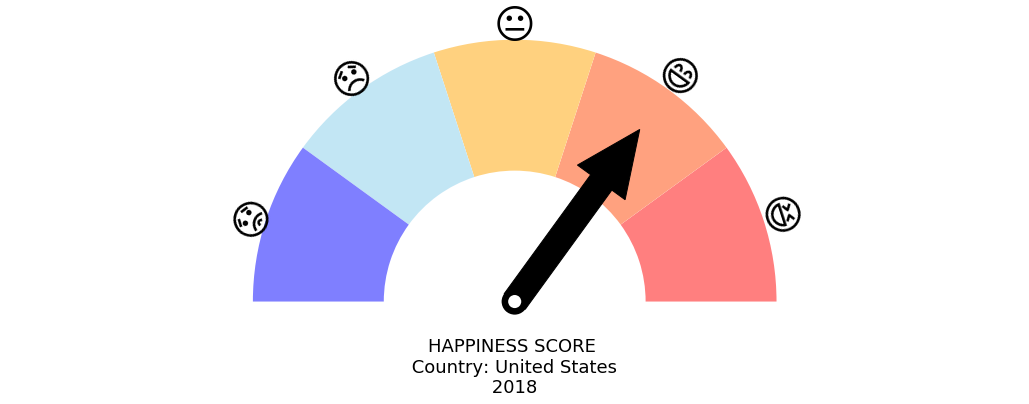

In [7]:
gauge(title= (f"HAPPINESS SCORE \n Country: {country_selected} \n 2018 "), arrow = arrow)